Homework - 01

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipydis
import time

In [2]:
# Read data
data = pd.read_csv('slimmed_realestate_data.csv')
print(data.columns)

Index(['Unnamed: 0', 'SalePrice', 'GrLivArea'], dtype='object')


In [3]:
n = len(data)
x = data['GrLivArea'].to_numpy()
y = data['SalePrice'].to_numpy()
sum_xy = np.sum(x*y)
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_x2 = np.sum(x*x)
denominator = n * sum_x2 - sum_x * sum_x
m = (n * sum_xy - sum_x * sum_y) / denominator
b = (sum_y * sum_x2 - sum_x * sum_xy) / denominator
print('y = %f * x + %f' % (m,b))

# saving these for later comparison
m_calc = m
b_calc = b

y = 87.688145 * x + 34754.077892


In [4]:
def model(x,m,b):
   return m * x + b

In [5]:
def loss(x,y,m,b):
   y_predicted = model(x,m,b)
   return np.power( y - y_predicted, 2 )

In [6]:
def updated_m(x,y,m,b,learning_rate):
   dL_dm = - 2 * x * (y - model(x,m,b))
   dL_dm = np.mean(dL_dm)
   return m - learning_rate * dL_dm

def updated_b(x,y,m,b,learning_rate):
   dL_db = - 2 * (y - model(x,m,b))
   dL_db = np.mean(dL_db)
   return b - learning_rate * dL_db

In [7]:
def plot_data(x,y,m,b,plt = plt):
   # plot our data points with 'bo' = blue circles
   plt.plot(x,y,'bo')
   # create the line based on our linear fit
   # first we need to make x points
   # the 'arange' function generates points between two limits (min,max)
   linear_x = np.arange(x.min(),x.max())
   # now we use our fit parameters to calculate the y points based on our x points
   linear_y = linear_x * m + b
   # plot the linear points using 'r-' = red line
   plt.plot(linear_x,linear_y,'r-',label='fit')

[029]  dy_i = 81.80 * x + 42262.52     previously calculated: y_i = 87.69 * x + 34754.08    loss: 1487922532.240259


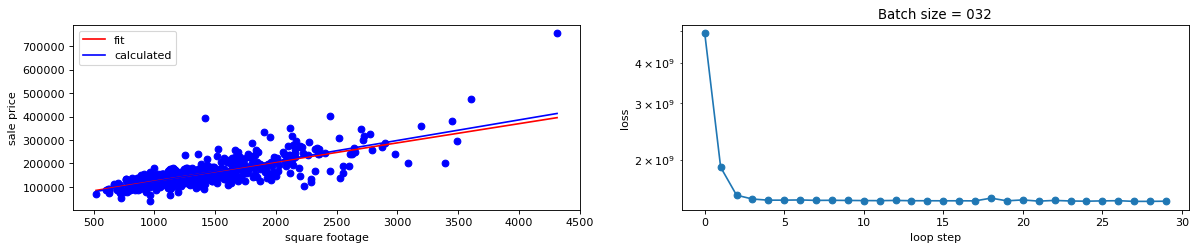

[029]  dy_i = 85.29 * x + 38927.74     previously calculated: y_i = 87.69 * x + 34754.08    loss: 1479998013.079010


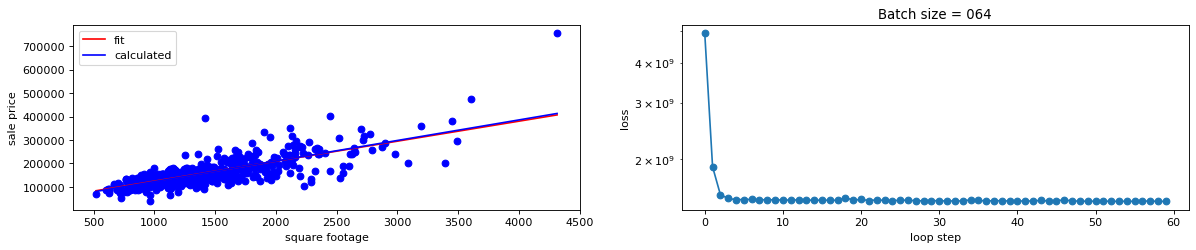

[029]  dy_i = 87.19 * x + 37155.33     previously calculated: y_i = 87.69 * x + 34754.08    loss: 1480722591.311204


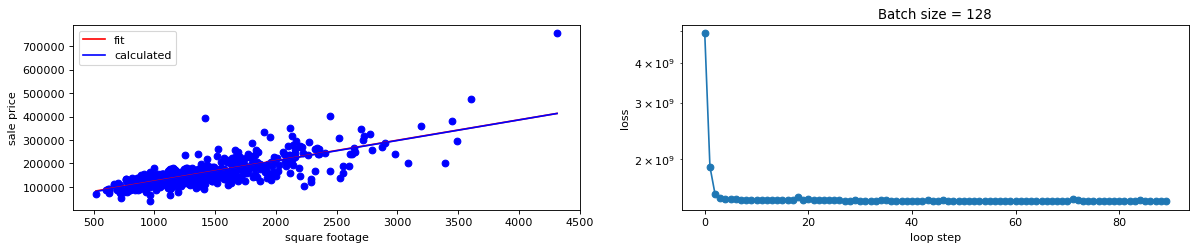

[029]  dy_i = 86.36 * x + 36037.08     previously calculated: y_i = 87.69 * x + 34754.08    loss: 1478619147.520308


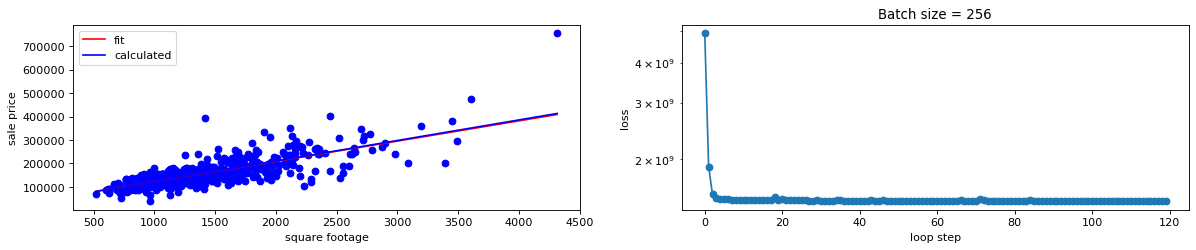

[029]  dy_i = 87.11 * x + 35747.12     previously calculated: y_i = 87.69 * x + 34754.08    loss: 1477906153.056283


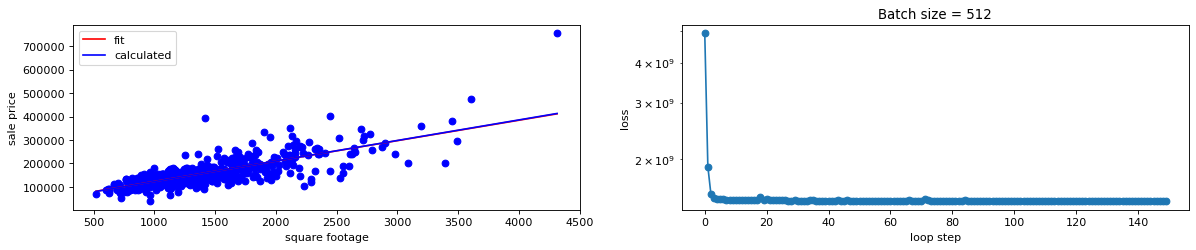

In [8]:
# set our initial slope and intercept
m = 5.
b = 1000.
# batch_size = 60
# set a learning rate for each parameter
learning_rate_m = 1e-7
learning_rate_b = 1e-1
# use these to plot our progress over time
loss_history = []

# we run our loop N times
loop_N = 30
batch_size = [2**5, 2**6, 2**7, 2**8, 2**9]


# close/delete previous plots
plt.close('all')

for k in range(len(batch_size)):
    num_batch = len(data)//batch_size[k]

    # create a 1 by 2 plot grid
    fig,ax = plt.subplots(1,2,figsize=(18,3),dpi=80)

    for i in range(loop_N):
        m_batch = 0
        b_batch = 0
    
        dL_dm = [None] * num_batch
        dL_db = [None] * num_batch
        
        for j in range(num_batch):
            # sample batch
            data_batch = data.sample(batch_size[k])
            data_x = data_batch['GrLivArea'].to_numpy()
            data_y = data_batch['SalePrice'].to_numpy()
            
            # update our slope and intercept based on the current values
            dL_dm[j] = np.mean(- 2 * data_x * (data_y - model(data_x,m,b)))
            #dL_dm_batch[j] = np.mean(dL_dm)
            dL_db[j] = np.mean(- 2 * (data_y - model(data_x,m,b)))
            #dL_db_batch[j] = np.mean(dL_db)
    
        # average results from each batch
        dL_dm = np.mean(dL_dm)
        dL_db = np.mean(dL_db)
        m = m - learning_rate_m *dL_dm
        b = b - learning_rate_b *dL_db
    
        # load entire dataset to evalauate loss value
        data_x = data['GrLivArea'].to_numpy()
        data_y = data['SalePrice'].to_numpy()
        
        # calculate the loss value
        loss_value = np.mean(loss(data_x,data_y,m,b))
        
        # keep a history of our loss values
        loss_history.append(loss_value)
        
    # print our progress
    print('[%03d]  dy_i = %.2f * x + %.2f     previously calculated: y_i = %.2f * x + %.2f    loss: %f' % (i,m,b,m_calc,b_calc,loss_value))
         

    # lot our usual output
    plot_data(data_x,data_y,m,b,ax[0])
    
    # here we also plot the calculated linear fit for comparison
    line_x = np.arange(data_x.min(),data_x.max())
    line_y = line_x * m_calc + b_calc
    ax[0].plot(line_x,line_y,'b-',label='calculated')
    # add a legend to the plot and x/y labels
    ax[0].legend()
    ax[0].set_xlabel('square footage')
    ax[0].set_ylabel('sale price')
    
    # plot the loss 
    loss_x = np.arange(0,len(loss_history))
    loss_y = np.asarray(loss_history)
    ax[1].plot(loss_x,loss_y, 'o-')
    ax[1].set_yscale('log')
    ax[1].set_xlabel('loop step')
    ax[1].set_ylabel('loss')
    plt.title('Batch size = %03d' % (batch_size[k]))
    plt.show()
    # gives us time to see the plot
    time.sleep(.1)
    # clears the plot when the next plot is ready to show.
    # ipydis.clear_output(wait=True)

[029]  dy_i = 80.61 * x + 43598.91     previously calculated: y_i = 87.69 * x + 34754.08    loss: 1492795221.648334


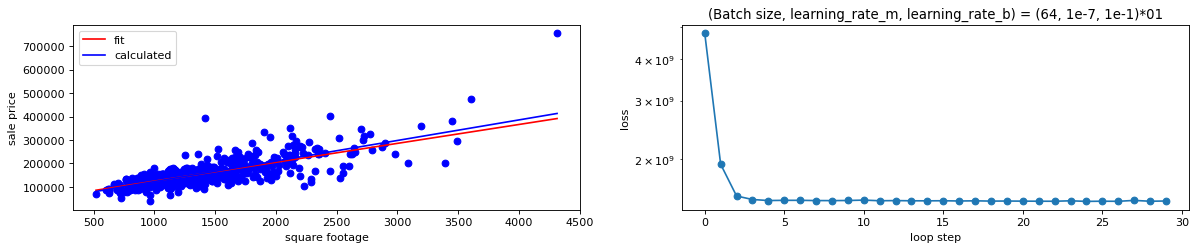

[029]  dy_i = 83.34 * x + 37361.87     previously calculated: y_i = 87.69 * x + 34754.08    loss: 1495346699.635051


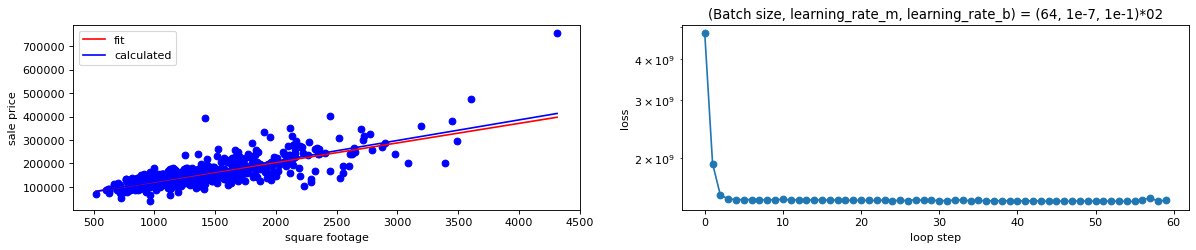

[029]  dy_i = -1700247.18 * x + -1042493201.27     previously calculated: y_i = 87.69 * x + 34754.08    loss: 12603944764632463360.000000


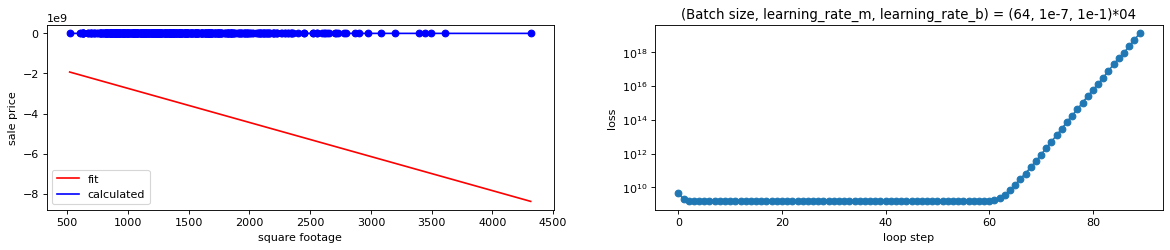

[029]  dy_i = -3507496629718654474256384.00 * x + -2263729746921151776558153728.00     previously calculated: y_i = 87.69 * x + 34754.08    loss: 55250404067106521886211730663484147920196689048964694016.000000


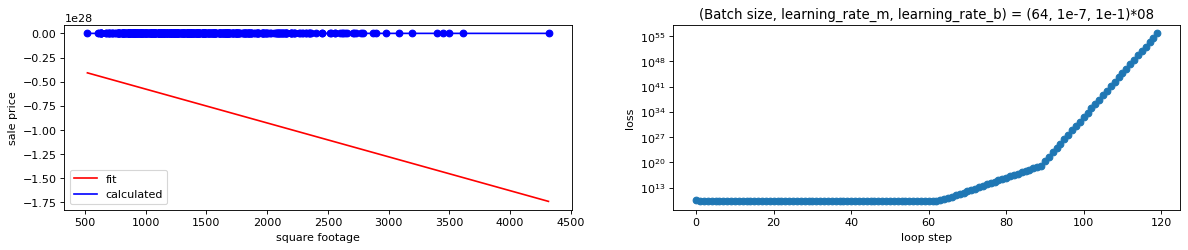

/soft/systems/jupyterhub/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/soft/systems/jupyterhub/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


[029]  dy_i = nan * x + nan     previously calculated: y_i = 87.69 * x + 34754.08    loss: nan


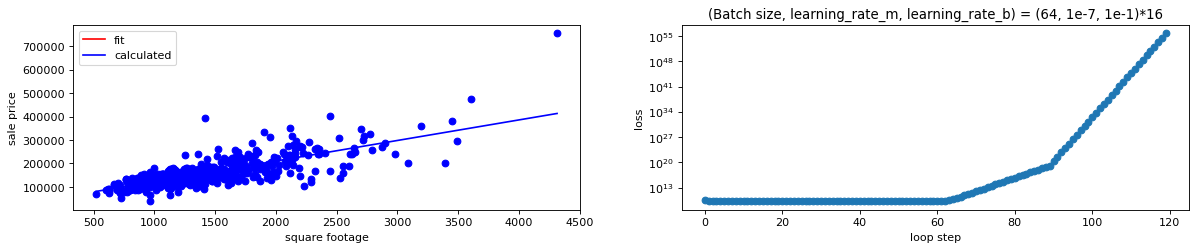

In [9]:
# set our initial slope and intercept
m = 5.
b = 1000.
# batch_size = 60
# set a learning rate for each parameter
learning_rate_m = 1e-7
learning_rate_b = 1e-1
# use these to plot our progress over time
loss_history = []

# we run our loop N times
loop_N = 30
batch_size = 2**6
linear_factor = [2**0, 2**1, 2**2, 2**3, 2**4]


# close/delete previous plots
plt.close('all')

for k in range(len(linear_factor)):
    num_batch = len(data)//(batch_size*linear_factor[k])

    # create a 1 by 2 plot grid
    fig,ax = plt.subplots(1,2,figsize=(18,3),dpi=80)

    for i in range(loop_N):
        m_batch = 0
        b_batch = 0
    
        dL_dm = [None] * num_batch
        dL_db = [None] * num_batch
        
        for j in range(num_batch):
            # sample batch
            data_batch = data.sample(batch_size*linear_factor[k])
            data_x = data_batch['GrLivArea'].to_numpy()
            data_y = data_batch['SalePrice'].to_numpy()
            
            # update our slope and intercept based on the current values
            dL_dm[j] = np.mean(- 2 * data_x * (data_y - model(data_x,m,b)))
            #dL_dm_batch[j] = np.mean(dL_dm)
            dL_db[j] = np.mean(- 2 * (data_y - model(data_x,m,b)))
            #dL_db_batch[j] = np.mean(dL_db)
    
        # average results from each batch
        dL_dm = np.mean(dL_dm)
        dL_db = np.mean(dL_db)
        m = m - learning_rate_m*linear_factor[k] *dL_dm
        b = b - learning_rate_b*linear_factor[k] *dL_db
    
        # load entire dataset to evalauate loss value
        data_x = data['GrLivArea'].to_numpy()
        data_y = data['SalePrice'].to_numpy()
        
        # calculate the loss value
        loss_value = np.mean(loss(data_x,data_y,m,b))
        
        # keep a history of our loss values
        loss_history.append(loss_value)
        
    # print our progress
    print('[%03d]  dy_i = %.2f * x + %.2f     previously calculated: y_i = %.2f * x + %.2f    loss: %f' % (i,m,b,m_calc,b_calc,loss_value))
         

    # lot our usual output
    plot_data(data_x,data_y,m,b,ax[0])
    
    # here we also plot the calculated linear fit for comparison
    line_x = np.arange(data_x.min(),data_x.max())
    line_y = line_x * m_calc + b_calc
    ax[0].plot(line_x,line_y,'b-',label='calculated')
    # add a legend to the plot and x/y labels
    ax[0].legend()
    ax[0].set_xlabel('square footage')
    ax[0].set_ylabel('sale price')
    
    # plot the loss 
    loss_x = np.arange(0,len(loss_history))
    loss_y = np.asarray(loss_history)
    ax[1].plot(loss_x,loss_y, 'o-')
    ax[1].set_yscale('log')
    ax[1].set_xlabel('loop step')
    ax[1].set_ylabel('loss')
    plt.title('(Batch size, learning_rate_m, learning_rate_b) = (64, 1e-7, 1e-1)*%02d' % (linear_factor[k]))
    plt.show()
    # gives us time to see the plot
    time.sleep(.1)
    # clears the plot when the next plot is ready to show.
    # ipydis.clear_output(wait=True)